# Масштабирование признаков

Масштабирование - это изменение диапазона измерения признака с целью улучшения качества построения модели.

**Почему необходимо масштабировать признаки?**

Многие алгоритмы машинного обучения устроены таким образом, что признаки с меньшей амплитудой оказываются "оштрафованы" по сравнению с признаками с большей амплитудой, и оказывают меньшее влияние на процесс построения модели.

**Пример. Метод ближайших соседей.** Ключевым шагом метода является вычисление расстояний между соседями. Чаще всего в методе ближайших соседей используется Евклидово расстояние:

$$d(p,q)= \sqrt{ (p_1-q_1)^2 + (p_2-q_2)^2 + \cdots + (p_n-q_n)^2 } = \sqrt{ \sum_{i=1}^{n} (p_i-q_i)^2} $$

Если один из признаков имеет амплитуду значительно меньшую по сравнению с другими признаками, то этот признак почти не будет вносить вклад при вычислении расстояния.

Методы машинного обучения (как с учителем, так и без учителя), **ЗАВИСЯЩИЕ** от масштабирования признаков:

- Метод ближайших соседей
- Линейная регрессия
- Логистическая регрессия
- Метод опорных векторов (SVM)
- Нейронные сети
- Некоторые алгоритмы кластеризации (K-means)
- Анализ главных компонент (Principal Component Analysis, PCA)

Методы машинного обучения, **НЕ ЗАВИСЯЩИЕ** от масштабирования признаков:

- Деревья решений и другие алгоритмы на их основе:
    - Случайный лес
    - Градиентный бустинг
    
В алгоритме построения дерева решения **не строится единое метрическое пространство по всем признакам.** Строится набор ветвлений по отдельным признакам, масштаб признаков не имеет значения.    

**Признаки нужно масштабировать до или после деления на обучающую и тестовую выборку?**

- Предположим, что мы разделили данные на обучающую и тестовую выборки, и взяли данные для масштабирования только из обучающей выборки.
- В этом случае наличие выбросов в тестовой выборке может нарушить схему масштабирования.
- Традиционным является подход, при котором данные делятся на обучающую и тестовую выборки ДО масштабирования. Параметры масштабирования (например, среднее значение, дисперсия) берутся только из обучающей выборки и затем применяются к тестовой выборке.
- Если выбросы в тестовой выборке мешают реализации этого подхода, то данные делятся на обучающую и тестовую выборки ПОСЛЕ масштабирования.

## Загрузка и предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

In [2]:
boston_dataset = load_boston()
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)
data['Y'] = boston_dataset.target
data.shape

(506, 14)

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# Нужно ли масштабирование
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
# DataFrame не содержащий целевой признак
X_ALL = data.drop('Y', axis=1)

In [6]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [7]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['Y'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((404, 13), (102, 13))

## Масштабирование данных на основе [Z-оценки](https://ru.wikipedia.org/wiki/Z-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0)

$$ x' = \frac{x - \mu(x) }{\sigma(x)} $$

где $x$ - признак, $\mu(x)=mean(x)$ - среднее значение, $\sigma(x)=std(x)$ - среднеквадратичное отклонение.

Особенности метода:
- Среднее значение приводится к 0.
- Среднеквадратичное отклонение приводится к 1.
- Форма исходного распределения сохраняется.
- Максимальные и минимальные значения могут варьироваться.
- Выбросы сохраняются. 

Метод реализован с использованием класса [StandardScaler.](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [8]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [9]:
data_cs11_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-8.513173e-17,3.306534e-16,2.804081e-16,-3.100287e-16,-8.071058e-16,-5.189086e-17,-2.650493e-16,8.293761e-17,1.514379e-15,-9.934960e-16,4.493551e-16,-1.451408e-16,-1.595123e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


In [10]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

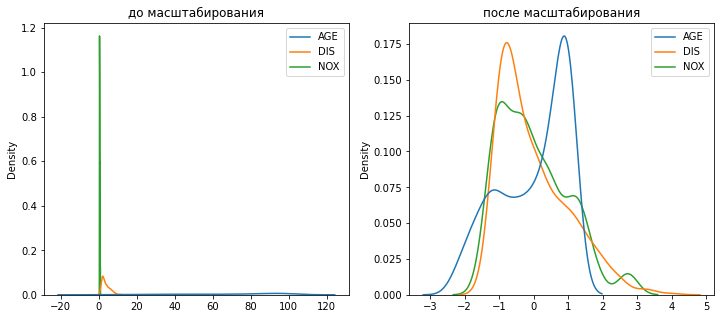

In [11]:
draw_kde(['AGE', 'DIS', 'NOX'], data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

In [12]:
# Обучаем StandardScaler на обучающей выборке 
# и масштабируем обучающую и тестовую выборки
cs12 = StandardScaler()
cs12.fit(X_train)
data_cs12_scaled_train_temp = cs12.transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# формируем DataFrame на основе массива
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)

In [13]:
data_cs12_scaled_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,2.184721e-17,-4.699211e-17,1.563656e-16,9.920557e-17,2.047317e-16,-2.278980e-15,-1.118467e-16,-2.000772e-16,-9.178576e-17,1.214650e-16,2.937694e-16,-6.943016e-16,-3.130059e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.040468e-01,-4.955934e-01,-1.552282e+00,-2.932942e-01,-1.439198e+00,-3.933600e+00,-2.279728e+00,-1.272916e+00,-9.770240e-01,-1.280985e+00,-2.694601e+00,-3.902881e+00,-1.532930e+00
25%,-3.956971e-01,-4.955934e-01,-8.607543e-01,-2.932942e-01,-8.995829e-01,-5.695181e-01,-8.653185e-01,-8.123032e-01,-6.309828e-01,-7.478768e-01,-5.600996e-01,2.071439e-01,-7.889097e-01
50%,-3.790796e-01,-4.955934e-01,-2.854561e-01,-2.932942e-01,-1.544004e-01,-1.304406e-01,3.107268e-01,-2.490170e-01,-5.156357e-01,-4.398585e-01,2.590875e-01,3.764843e-01,-1.822471e-01
75%,-1.122307e-02,3.642723e-01,1.026692e+00,-2.932942e-01,6.079127e-01,5.196410e-01,9.075128e-01,6.209316e-01,1.675959e+00,1.556337e+00,8.129041e-01,4.266055e-01,5.999280e-01
max,9.334961e+00,3.803735e+00,2.436063e+00,3.409545e+00,2.723546e+00,3.648022e+00,1.123968e+00,3.918286e+00,1.675959e+00,1.822891e+00,1.643629e+00,4.347267e-01,3.495190e+00


In [14]:
data_cs12_scaled_test.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,-0.045577,-0.034891,0.042993,-0.184387,0.070909,0.114168,0.111162,-0.072755,0.045268,0.146329,0.038737,-0.026026,-0.086363
std,0.656509,1.012988,1.014106,0.628713,0.959955,1.094771,0.926327,0.967542,1.020790,0.982814,0.995147,0.992407,0.949883
min,-0.403539,-0.495593,-1.436784,-0.293294,-1.404937,-3.095394,-2.037858,-1.250021,-0.977024,-1.245445,-2.509996,-3.822381,-1.506568
25%,-0.396089,-0.495593,-0.889263,-0.293294,-0.591232,-0.412627,-0.520918,-0.824742,-0.630983,-0.587944,-0.479335,0.154425,-0.838511
50%,-0.369668,-0.495593,-0.172151,-0.293294,-0.103009,0.083106,0.370318,-0.441429,-0.515636,-0.114070,0.351390,0.362867,-0.265494
75%,-0.000568,-0.495593,1.026692,-0.293294,0.607913,0.498214,0.970609,0.644051,1.675959,1.556337,0.812904,0.429149,0.504888
max,3.717887,3.588769,2.436063,3.409545,2.723546,3.568124,1.123968,3.249754,1.675959,1.822891,1.274418,0.434727,2.385230


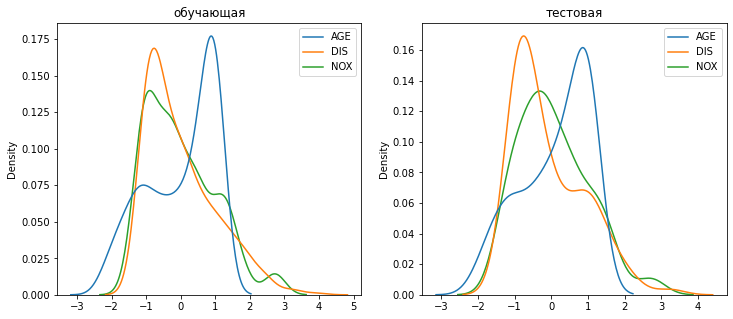

In [15]:
# распределения для обучающей и тестовой выборки немного отличаются
draw_kde(['AGE', 'DIS', 'NOX'], data_cs12_scaled_train, data_cs12_scaled_test, 'обучающая', 'тестовая')

## Масштабирование "Mean Normalisation"

$$ x' = \frac{x - \mu(x) }{max(x)-min(x)} $$

где $x$ - признак, $\mu(x)=mean(x)$ - среднее значение.

Особенности метода:
- Среднее значение приводится к 0.
- Среднеквадратичное отклонение может варьироваться.
- Форма исходного распределения может изменяться.
- Максимальные и минимальные значения в диапазоне [-1;1].
- Выбросы сохраняются. 

Нет стандартного класса, возможна реализация с использованием Pandas.

In [16]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [17]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,-0.000943,-0.001636,0.002173,-0.010038,0.003434,0.003036,0.006583,-0.002825,0.003440,0.009503,0.001800,-0.001209,-0.003462
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049
min,-0.041487,-0.115272,-0.389205,-0.079208,-0.345733,-0.518834,-0.669780,-0.245206,-0.368274,-0.412705,-0.621129,-0.899777,-0.304871
25%,-0.040636,-0.115272,-0.215817,-0.079208,-0.214046,-0.073442,-0.235949,-0.156947,-0.237839,-0.237132,-0.110491,0.045952,-0.160832
50%,-0.038675,-0.115272,-0.050861,-0.079208,-0.030918,-0.011552,0.098500,-0.056258,-0.194361,-0.139804,0.065041,0.086455,-0.039143
75%,-0.000229,0.009728,0.257423,-0.079208,0.146037,0.067965,0.269200,0.123882,0.631726,0.501417,0.187382,0.098521,0.115244
max,0.958513,0.884728,0.610795,0.920792,0.654267,0.481166,0.330220,0.754794,0.631726,0.587295,0.378871,0.100223,0.695129


In [18]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

In [19]:
data_cs22_scaled_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,5.152644e-18,-1.174803e-17,3.782728e-16,-1.490832e-17,-8.763273e-16,8.858769e-16,5.265315e-16,4.751597e-17,-3.991582e-17,3.744255e-17,4.988343e-15,1.837605e-15,-1.657777e-16
std,1.028072e-01,2.328828e-01,2.510415e-01,2.703979e-01,2.405240e-01,1.320614e-01,2.941626e-01,1.928724e-01,3.774016e-01,3.225773e-01,2.307945e-01,2.308277e-01,1.991281e-01
min,-4.148747e-02,-1.152723e-01,-3.892045e-01,-7.920792e-02,-3.457330e-01,-5.188335e-01,-6.697801e-01,-2.452064e-01,-3.682738e-01,-4.127050e-01,-6.211291e-01,-8.997773e-01,-3.048714e-01
25%,-4.063013e-02,-1.152723e-01,-2.158174e-01,-7.920792e-02,-2.161034e-01,-7.511824e-02,-2.542291e-01,-1.564769e-01,-2.378390e-01,-2.409493e-01,-1.291079e-01,4.775534e-02,-1.568995e-01
50%,-3.892385e-02,-1.152723e-01,-7.157258e-02,-7.920792e-02,-3.709102e-02,-1.720484e-02,9.129100e-02,-4.796903e-02,-1.943607e-01,-1.417126e-01,5.972193e-02,8.679538e-02,-3.624557e-02
75%,-1.152384e-03,8.472772e-02,2.574230e-01,-7.920792e-02,1.460365e-01,6.853955e-02,2.666257e-01,1.196123e-01,6.317262e-01,5.014171e-01,1.873815e-01,9.835043e-02,1.193146e-01
max,9.585125e-01,8.847277e-01,6.107955e-01,9.207921e-01,6.542670e-01,4.811665e-01,3.302199e-01,7.547936e-01,6.317262e-01,5.872950e-01,3.788709e-01,1.002227e-01,6.951286e-01


In [20]:
data_cs22_scaled_test.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,-0.004680,-0.008115,0.010780,-0.049796,0.017034,0.015058,0.032659,-0.014015,0.017063,0.047144,0.008929,-0.006000,-0.017176
std,0.067410,0.235615,0.254267,0.169792,0.230606,0.144398,0.272153,0.186381,0.384771,0.316641,0.229390,0.228791,0.188914
min,-0.041435,-0.115272,-0.360246,-0.079208,-0.337503,-0.408276,-0.598719,-0.240796,-0.368274,-0.401255,-0.578576,-0.881219,-0.299629
25%,-0.040670,-0.115272,-0.222966,-0.079208,-0.142029,-0.054425,-0.153045,-0.158873,-0.237839,-0.189423,-0.110491,0.035601,-0.166764
50%,-0.037958,-0.115272,-0.043163,-0.079208,-0.024745,0.010961,0.108799,-0.085034,-0.194361,-0.036751,0.080999,0.083656,-0.052802
75%,-0.000058,-0.115272,0.257423,-0.079208,0.146037,0.065713,0.285163,0.124066,0.631726,0.501417,0.187382,0.098937,0.100413
max,0.381752,0.834728,0.610795,0.920792,0.654267,0.470628,0.330220,0.626012,0.631726,0.587295,0.293764,0.100223,0.474378


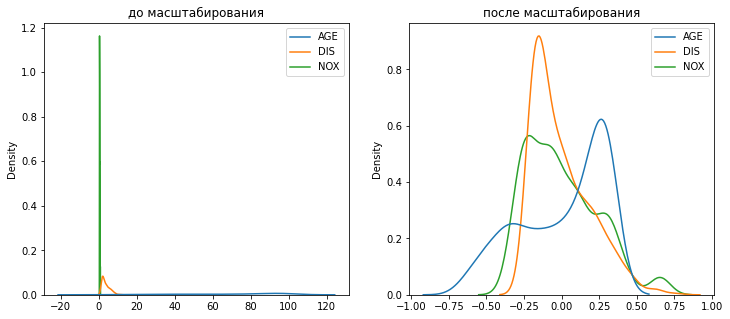

In [21]:
draw_kde(['AGE', 'DIS', 'NOX'], data, data_cs21_scaled, 'до масштабирования', 'после масштабирования')

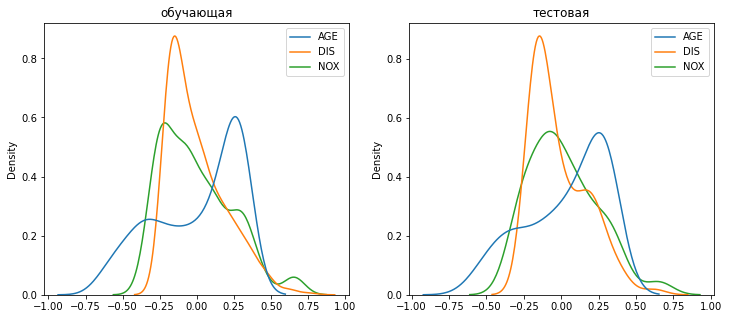

In [22]:
draw_kde(['AGE', 'DIS', 'NOX'], data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')

## MinMax-масштабирование

$$ x' = \frac{x - min(x)}{max(x)-min(x)} $$

Особенности метода:
- Среднее значение может варьироваться.
- Среднеквадратичное отклонение может варьироваться.
- Форма исходного распределения может изменяться.
- Максимальные и минимальные значения в диапазоне [0;1].
- Выбросы сохраняются. 


Метод реализован с использованием класса [MinMaxScaler.](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [23]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)

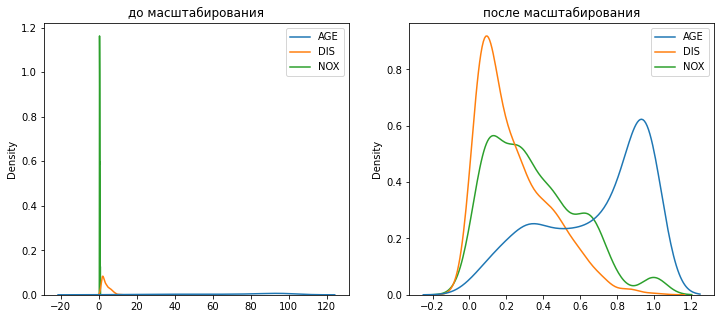

In [25]:
draw_kde(['AGE', 'DIS', 'NOX'], data, data_cs31_scaled, 'до масштабирования', 'после масштабирования')

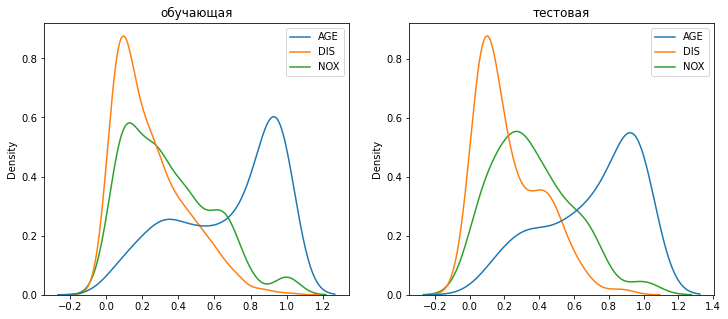

In [26]:
draw_kde(['AGE', 'DIS', 'NOX'], data_cs32_scaled_train, data_cs32_scaled_test, 'обучающая', 'тестовая')

## Масштабирование по медиане 

$$ x' = \frac{x - median(x)}{IQR} $$

где

$$ IQR = Q3(x) - Q1(x) $$

$IQR -$ разность между 1 и 3 квартилями.

Особенности метода:
- Медиана приводится к 0.
- Среднеквадратичное отклонение может варьироваться.
- Форма исходного распределения может изменяться.
- Максимальные и минимальные значения могут варьироваться.
- Устраняются выбросы. 

Метод реализован с использованием класса [RobustScaler.](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

In [27]:
cs41 = RobustScaler()
data_cs41_scaled_temp = cs41.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs41_scaled = arr_to_df(data_cs41_scaled_temp)
data_cs41_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,5.060000e+02,506.000000,506.000000,506.000000,506.000000,5.060000e+02
mean,9.337910e-01,0.909091,0.112067,0.069170,0.095400,0.103163,-0.181959,1.902672e-01,0.227470,0.202163,-0.212309,-1.667632,1.292417e-01
std,2.392616e+00,1.865796,0.531398,0.253994,0.662158,0.952056,0.573881,6.818457e-01,0.435363,0.435496,0.773195,4.379176,7.137493e-01
min,-6.959315e-02,0.000000,-0.714950,0.000000,-0.874286,-3.587398,-1.520897,-6.728244e-01,-0.200000,-0.369509,-2.303571,-18.761003,-9.625187e-01
25%,-4.852940e-02,0.000000,-0.348567,0.000000,-0.508571,-0.437669,-0.662080,-3.585445e-01,-0.050000,-0.131783,-0.589286,-0.770476,-4.407796e-01
50%,-7.697835e-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.199102e-17,0.000000,0.000000,0.000000,0.000000,8.868774e-17
75%,9.514706e-01,1.000000,0.651433,0.000000,0.491429,0.562331,0.337920,6.414555e-01,0.950000,0.868217,0.410714,0.229524,5.592204e-01
max,2.467838e+01,8.000000,1.398141,1.000000,1.902857,3.484417,0.458716,2.888060e+00,0.950000,0.984496,1.053571,0.261902,2.659670e+00


In [28]:
cs42 = RobustScaler()
cs42.fit(X_train)
data_cs42_scaled_train_temp = cs42.transform(X_train)
data_cs42_scaled_test_temp = cs42.transform(X_test)
# формируем DataFrame на основе массива
data_cs42_scaled_train = arr_to_df(data_cs42_scaled_train_temp)
data_cs42_scaled_test = arr_to_df(data_cs42_scaled_test_temp)

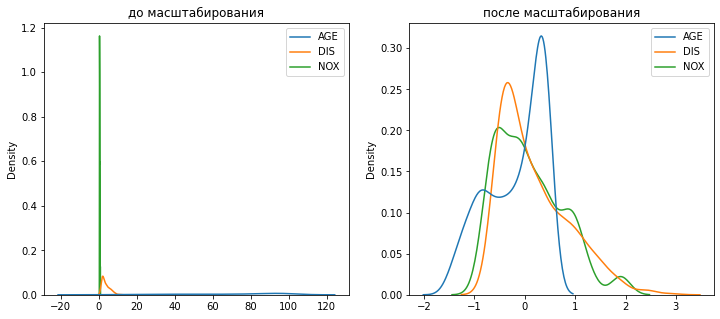

In [29]:
draw_kde(['AGE', 'DIS', 'NOX'], data, data_cs41_scaled, 'до масштабирования', 'после масштабирования')

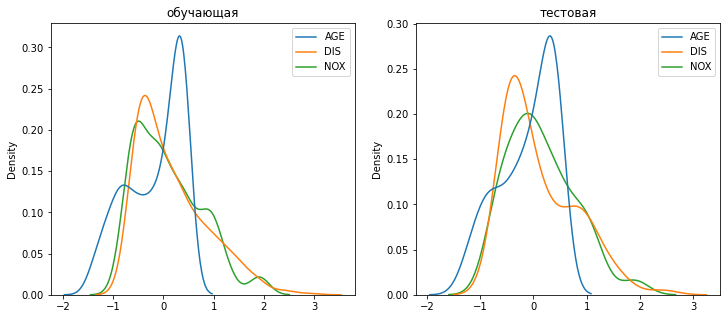

In [30]:
draw_kde(['AGE', 'DIS', 'NOX'], data_cs42_scaled_train, data_cs42_scaled_test, 'обучающая', 'тестовая')

## Масштабирование по максимальному значению

$$ x' = \frac{x}{max(|x|)} $$

Особенности метода:
- Среднее значение НЕ ЦЕНТРИРУЕТСЯ. Предполагается что оно уже отцентрировано исходя их характера данных.
- Среднеквадратичное отклонение не масштабируется.
- Форма исходного распределения может изменяться.
- Максимальные и минимальные значения в диапазоне [-1;1].

Метод реализован с использованием класса [MaxAbsScaler.](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)

Для центрирования распределения возможна комбинация с другими методами, например со StandardScaler. 

In [31]:
cs51 = MaxAbsScaler()
data_cs51_scaled_temp = cs51.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs51_scaled = arr_to_df(data_cs51_scaled_temp)
data_cs51_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040612,0.113636,0.401470,0.069170,0.636849,0.715790,0.685749,0.312954,0.397892,0.574173,0.838888,0.898650,0.333238
std,0.096672,0.233225,0.247309,0.253994,0.133040,0.080025,0.281489,0.173645,0.362802,0.237042,0.098407,0.230020,0.188071
min,0.000071,0.000000,0.016583,0.000000,0.442021,0.405581,0.029000,0.093151,0.041667,0.263010,0.572727,0.000806,0.045562
25%,0.000922,0.000000,0.187094,0.000000,0.515499,0.670330,0.450250,0.173189,0.166667,0.392405,0.790909,0.945773,0.183039
50%,0.002883,0.000000,0.349315,0.000000,0.617681,0.707118,0.775000,0.264499,0.208333,0.464135,0.865909,0.986243,0.299184
75%,0.041327,0.125000,0.652487,0.000000,0.716418,0.754385,0.940750,0.427858,1.000000,0.936709,0.918182,0.998299,0.446537
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
cs52_mas = MaxAbsScaler()
cs52_mean = StandardScaler(with_mean=True, with_std=False)

cs52_mas.fit(X_train)
cs52_mean.fit(X_train)

data_cs52_scaled_train_temp = cs52_mas.transform(cs52_mean.transform(X_train))
data_cs52_scaled_test_temp = cs52_mas.transform(cs52_mean.transform(X_test))
# формируем DataFrame на основе массива
data_cs52_scaled_train = arr_to_df(data_cs52_scaled_train_temp)
data_cs52_scaled_test = arr_to_df(data_cs52_scaled_test_temp)

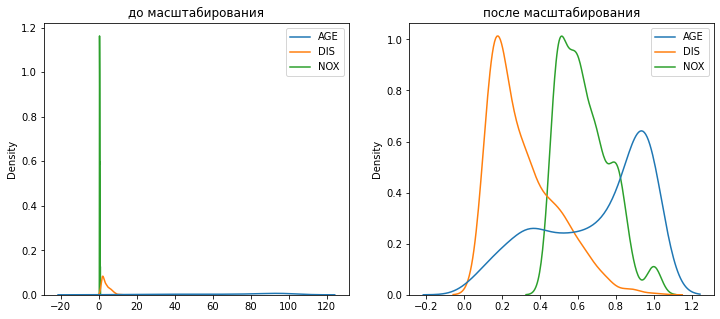

In [33]:
draw_kde(['AGE', 'DIS', 'NOX'], data, data_cs51_scaled, 'до масштабирования', 'после масштабирования')

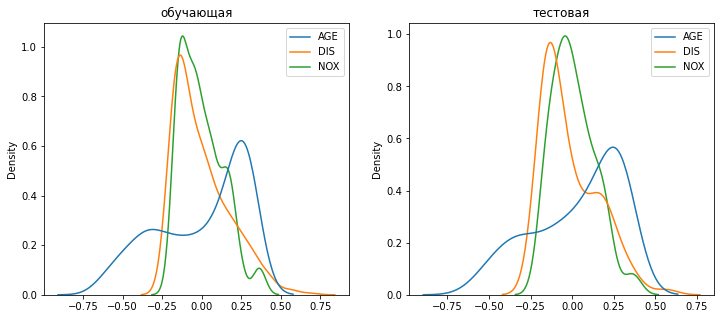

In [34]:
draw_kde(['AGE', 'DIS', 'NOX'], data_cs52_scaled_train, data_cs52_scaled_test, 'обучающая', 'тестовая')

## Нормализация

Частным случаем масштабирования является [нормализация.](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-normalization) В этом случае масштабируются не признаки (столбцы матрицы), а объекты (строки матрицы) путем деления на l1 или l2 норму вектора-строки.

Реализуется с использованием класса [Normalizer.](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html)

Этот подход может быть полезен в случае обработки текстовых данных или кластеризации.

## Обучение моделей с различными вариантами масштабирования признаков

In [35]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [37]:
clas_models_dict = {'LinR': LinearRegression(), 
                    'SVR': SVR(),
                    'KNN_5':KNeighborsRegressor(n_neighbors=5),
                    'Tree':DecisionTreeRegressor(random_state=1),
                    'GB': GradientBoostingRegressor(random_state=1),
                    'RF':RandomForestRegressor(n_estimators=50, random_state=1)}

In [38]:
X_data_dict = {'Original': (X_train_df, X_test_df),
               'StandardScaler': (data_cs12_scaled_train, data_cs12_scaled_test), 
               'MeanNormalisation': (data_cs22_scaled_train, data_cs22_scaled_test),
               'MinMaxScaler': (data_cs32_scaled_train, data_cs32_scaled_test), 
               'RobustScaler': (data_cs42_scaled_train, data_cs42_scaled_test),
               'MaxAbsScaler': (data_cs52_scaled_train, data_cs52_scaled_test)}

In [39]:
def test_models(clas_models_dict, X_data_dict, y_train, y_test):
    
    logger = MetricLogger()
    
    for model_name, model in clas_models_dict.items():
        
        for data_name, data_tuple in X_data_dict.items():

            X_train, X_test = data_tuple
              
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            logger.add(model_name, data_name, mse)
            
    return logger

In [40]:
%%time
logger = test_models(clas_models_dict, X_data_dict, y_train, y_test)

Wall time: 1.94 s


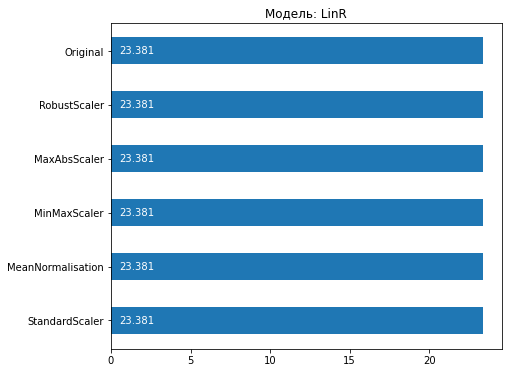

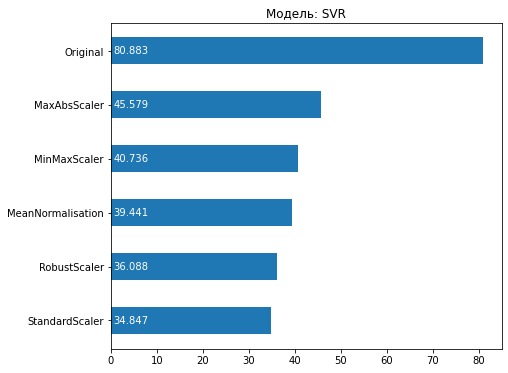

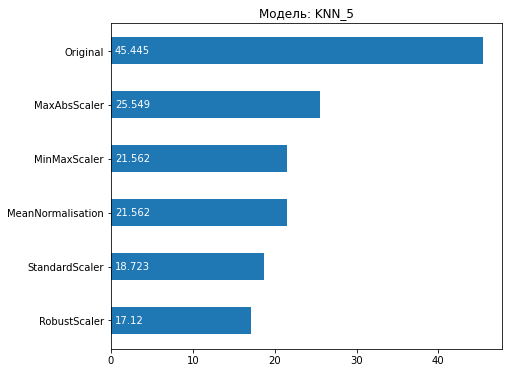

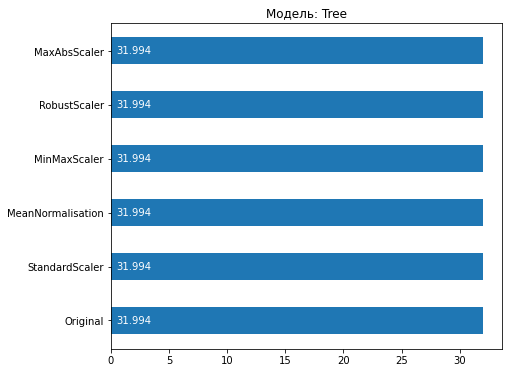

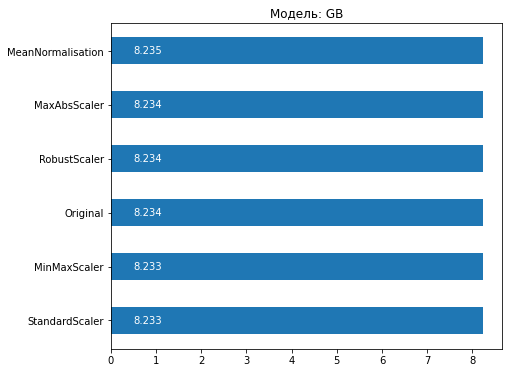

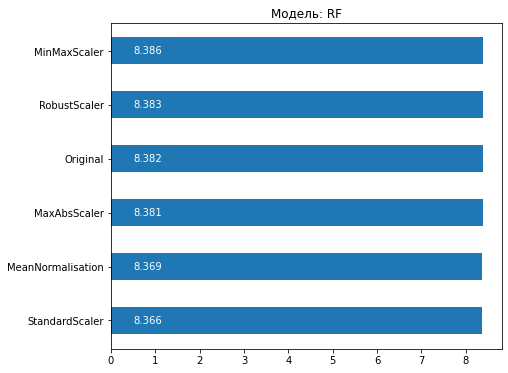

In [41]:
# Построим графики метрик качества модели
for model in clas_models_dict:
    logger.plot('Модель: ' + model, model, figsize=(7, 6))